<a href="https://colab.research.google.com/github/dev02chandan/Signal-and-Image-Processing/blob/main/8_Edge_Detection_using_Sobels_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aim :

    a. Apply Sobel’s mask on the given test image to obtain component of gradient |𝑔𝑥| , |𝑔𝑦| 𝑎𝑛𝑑 |𝑔𝑥+𝑔𝑦|

    b. Apply 5x5 averaging filter on the test image and then implement the sequence in step a.

    c. Summarize your observations after comparing the results obtained in step a and b

## Preprocessing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread("/content/building.tif", 0)

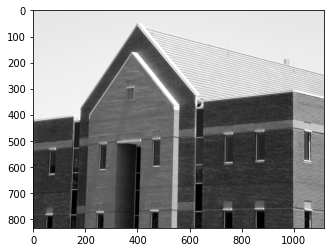

In [ ]:
plt.imshow(img, cmap="gray")

In [ ]:
(rows,cols) = img.shape
print(rows,cols) 

834 1114


## Applying Sobel's Mask

**Horizontal Edge fx**

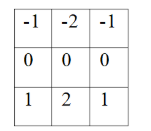

In [ ]:
horizontal_mask = np.array([-1,-2,-1,0,0,0,1,2,1]).reshape(3,3) # Horizontal Mask

In [ ]:
h_img = np.zeros((rows,cols)) # This will store the image with horizontal filter

In [ ]:
# # Method 1
# # Applying the mask
# # we are excluding borders - therefore from 1 to rows-1
# for row in range(1, rows-1):
#     for col in range(1, cols-1):
#         h_img[row][col] = img[row-1][col-1]*horizontal_mask[0,0] + img[row-1][col]*horizontal_mask[0,1] + img[row-1][col+1]*horizontal_mask[0,2] + img[row][col-1]*horizontal_mask[1,0] + img[row][col]*horizontal_mask[1,1] + img[row][col+1]*horizontal_mask[1,2] + img[row+1][col-1]*horizontal_mask[2,0] + img[row+1][col]*horizontal_mask[2,1] + img[row+1][col+1]*horizontal_mask[2,2]

In [ ]:
# Method 2
for row in range(1, rows-1):
    for col in range(1, cols-1):
        h_img[row][col] = np.multiply(img[row-1:row+2, col-1:col+2], horizontal_mask).sum()

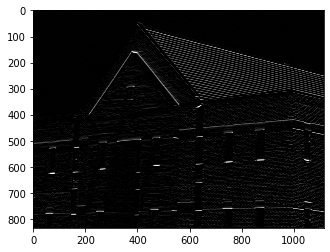

In [ ]:
plt.imshow(h_img, cmap="gray", vmin=0, vmax=255)

**Vertical Edge fx**

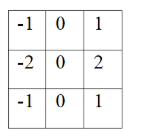

In [ ]:
vertical_mask = np.array([-1,0,1,-2,0,2,-1,0,1]).reshape(3,3)

In [ ]:
v_img = np.zeros((rows,cols))

In [ ]:
# # Method 1
# for row in range(1, rows-1):
#     for col in range(1, cols-1):
#         v_img[row][col] = img[row-1][col-1]*vertical_mask[0,0] + img[row-1][col]*vertical_mask[0,1] + img[row-1][col+1]*vertical_mask[0,2] + img[row][col-1]*vertical_mask[1,0] + img[row][col]*vertical_mask[1,1] + img[row][col+1]*vertical_mask[1,2] + img[row+1][col-1]*vertical_mask[2,0] + img[row+1][col]*vertical_mask[2,1] + img[row+1][col+1]*vertical_mask[2,2]

In [ ]:
# Method 2
for row in range(1, rows-1):
    for col in range(1, cols-1):
        v_img[row][col] = np.multiply(img[row-1:row+2, col-1:col+2], vertical_mask).sum()

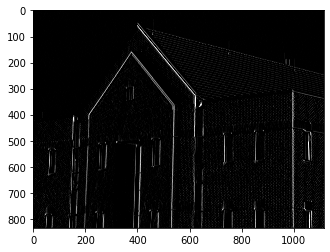

In [ ]:
plt.imshow(v_img, cmap="gray", vmin=0, vmax=255)

**Diagonal Edge fx**

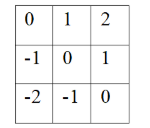

In [ ]:
diagonal_mask = np.array([0,1,2,-1,0,1,-2,-1,0]).reshape(3,3)

In [ ]:
d_img = np.zeros((rows,cols))

In [ ]:
# # Method 1
# for row in range(1, rows-1):
#     for col in range(1, cols-1):
#         d_img[row][col] = img[row-1][col-1]*diagonal_mask[0,0] + img[row-1][col]*diagonal_mask[0,1] + img[row-1][col+1]*diagonal_mask[0,2] + img[row][col-1]*diagonal_mask[1,0] + img[row][col]*diagonal_mask[1,1] + img[row][col+1]*diagonal_mask[1,2] + img[row+1][col-1]*diagonal_mask[2,0] + img[row+1][col]*diagonal_mask[2,1] + img[row+1][col+1]*diagonal_mask[2,2]

In [ ]:
# Method 2
for row in range(1, rows-1):
    for col in range(1, cols-1):
        d_img[row][col] = np.multiply(img[row-1:row+2, col-1:col+2], diagonal_mask).sum()

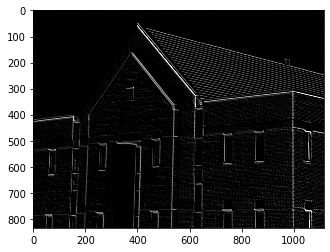

In [ ]:
plt.imshow(d_img, cmap="gray", vmin=0, vmax=255)

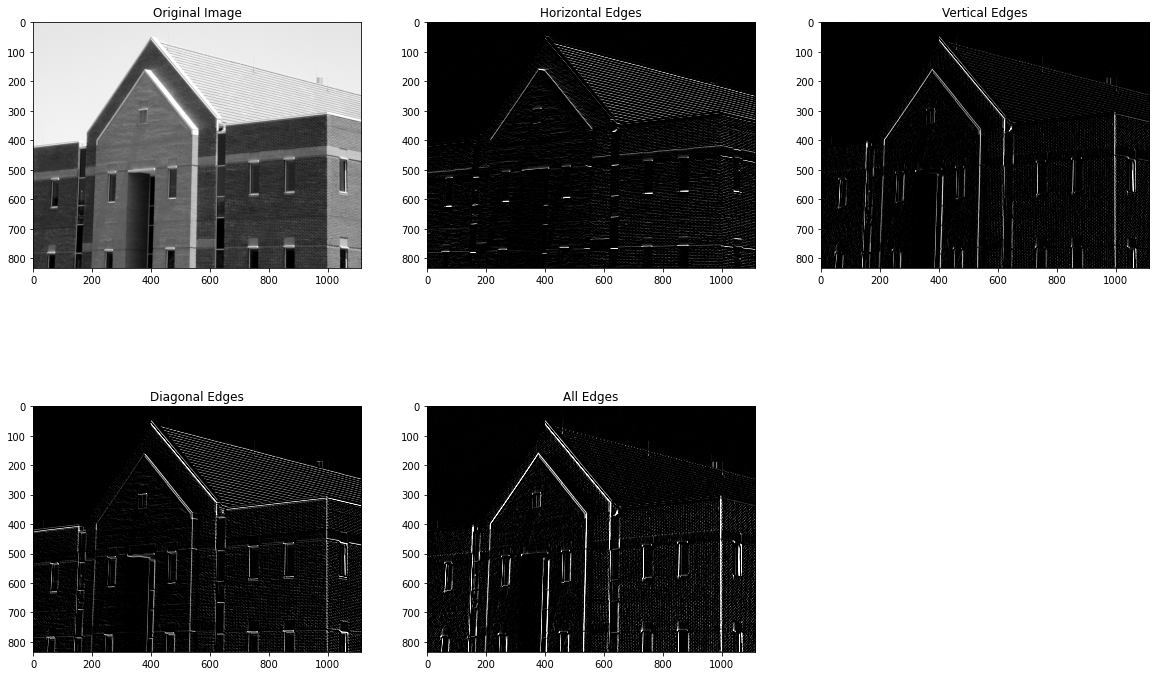

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.title('Original Image')
plt.imshow(img ,cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,2)
plt.imshow(h_img, cmap='gray', vmin=0, vmax=255)
plt.title('Horizontal Edges')

plt.subplot(3,3,3)
plt.imshow(v_img, cmap='gray', vmin=0, vmax=255)
plt.title('Vertical Edges')

plt.subplot(3,3,4)
plt.imshow(d_img, cmap='gray', vmin=0, vmax=255)
plt.title('Diagonal Edges')

plt.subplot(3,3,5)
img_hvd= h_img + v_img + d_img
plt.title("All Edges")
plt.imshow(img_hvd, cmap='gray', vmin=0, vmax=255)

### Averaging the Image

In [ ]:
img_avg = np.zeros((rows,cols), dtype=int)

In [ ]:
# Now applying a filter of 5*5 to average the image
s = 5
for i in range(s,rows-s):
    for j in range(s, cols-s):
        temp = img[i-s:i+s+1,j-s:j+s+1]
        c = np.sum(temp)
        img_avg[i,j] = c//s**2

Text(0.5, 1.0, 'Original Image')

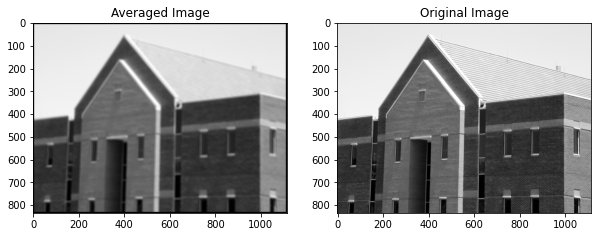

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img_avg, cmap="gray")
plt.title("Averaged Image")

plt.subplot(1,2,2)
plt.imshow(img, cmap="gray")
plt.title("Original Image")

In [ ]:
h1_img = np.zeros((rows,cols))
v1_img = np.zeros((rows,cols))
d1_img = np.zeros((rows, cols))
img_hvd1 = np.zeros((rows,cols))

In [ ]:
for row in range(1, rows-1):
    for col in range(1, cols-1):
        h1_img[row][col] = np.multiply(img_avg[row-1:row+2, col-1:col+2], horizontal_mask).sum()

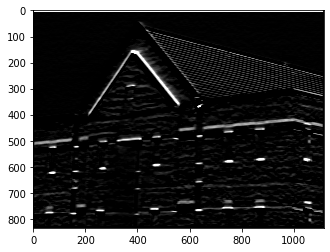

In [ ]:
plt.imshow(h1_img, cmap="gray", vmin=0 , vmax= 255)

In [ ]:
for row in range(1, rows-1):
    for col in range(1, cols-1):
        v1_img[row][col] = np.multiply(img_avg[row-1:row+2, col-1:col+2], vertical_mask).sum()

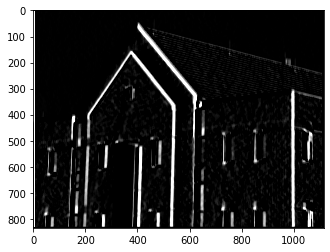

In [ ]:
plt.imshow(v1_img, cmap="gray", vmin=0 , vmax= 255)

In [ ]:
for row in range(1, rows-1):
    for col in range(1, cols-1):
        d1_img[row][col] = np.multiply(img_avg[row-1:row+2, col-1:col+2], diagonal_mask).sum()

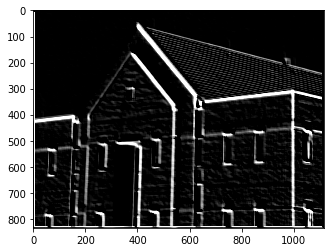

In [ ]:
plt.imshow(d1_img, cmap="gray", vmin=0 , vmax= 255)

In [ ]:
img_hvd1 = h1_img + v1_img + d1_img

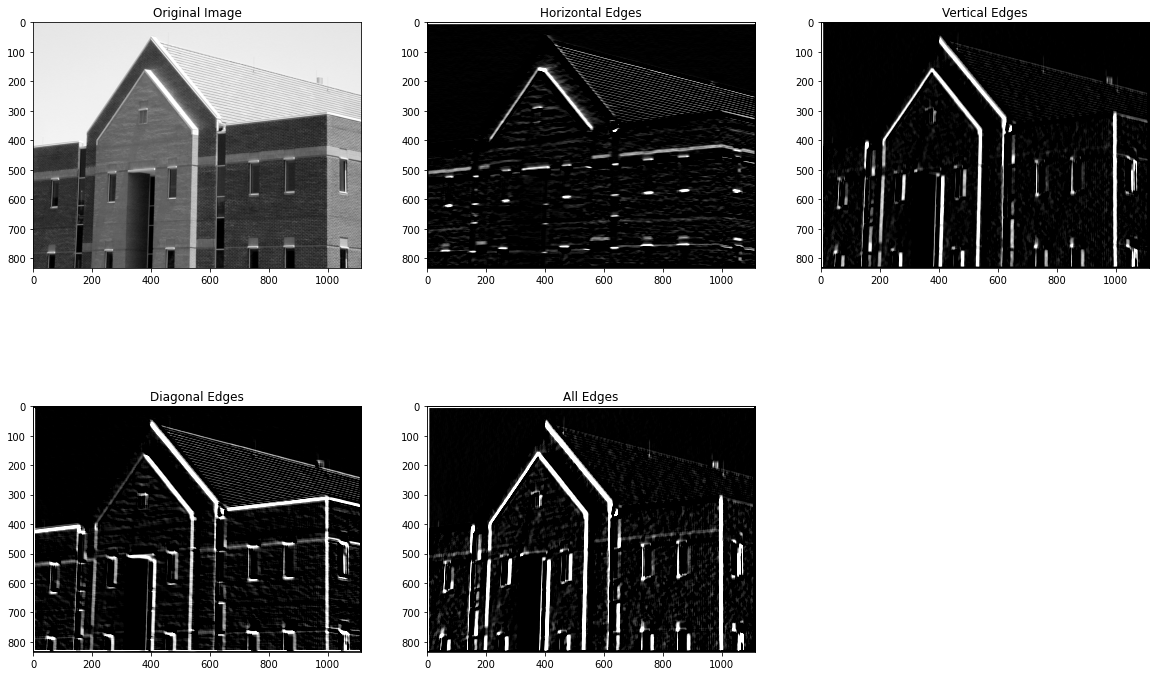

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.title('Original Image')
plt.imshow(img ,cmap='gray', vmin=0, vmax=255)

plt.subplot(3,3,2)
plt.imshow(h1_img, cmap='gray', vmin=0, vmax=255)
plt.title('Horizontal Edges')

plt.subplot(3,3,3)
plt.imshow(v1_img, cmap='gray', vmin=0, vmax=255)
plt.title('Vertical Edges')

plt.subplot(3,3,4)
plt.imshow(d1_img, cmap='gray', vmin=0, vmax=255)
plt.title('Diagonal Edges')

plt.subplot(3,3,5)
plt.title("All Edges")
plt.imshow(img_hvd1, cmap='gray', vmin=0, vmax=255)

Text(0.5, 1.0, 'Edges with Averaging')

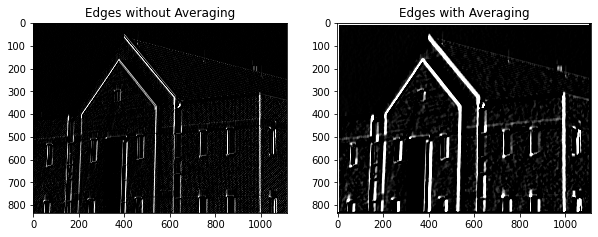

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_hvd, cmap="gray", vmin=0, vmax=255)
plt.title("Edges without Averaging")

plt.subplot(1,2,2)
plt.imshow(img_hvd1, cmap="gray", vmin=0, vmax=255)
plt.title("Edges with Averaging")

## Conclusion:
We found the Horizontal, Vertical and Diagonal Edges of the given Image.
Post this, we added the three to find all the edges.
We then performed averaging to the Image.

We observe that after **Averaging**, the Image Edges are ***clearer*** and more ***significant***.